In [0]:
import numpy as np                          
import os                                   
from sklearn.metrics import confusion_matrix
import seaborn as sn                        
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                  
import tensorflow as tf                    

In [0]:
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras.constraints import maxnorm
from keras.models import load_model
from keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation,LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from keras import initializers
from keras import backend as K
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras import regularizers
from keras import optimizers

In [0]:
# Here's our 6 categories that we have to classify.
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {'mountain': 0,
                    'street' : 1,
                    'glacier' : 2,
                    'buildings' : 3,
                    'sea' : 4,
                    'forest' : 5
                    }
nb_classes = 6

In [5]:

os.getcwd()
!ls "/content/drive/My Drive/IntelData/IntelData"



seg_pred  seg_test  seg_train


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 10,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['seg_train', 'seg_test']
    size = (150,150)
    output = []
    for dataset in datasets:
        directory = "/content/drive/My Drive/IntelData/IntelData/" + dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                images.append(curr_img)
                labels.append(curr_label)
        images, labels = shuffle(images, labels)     
        images = np.array(images, dtype = 'float32') 
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [0]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [8]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))


Number of training examples: 14033
Number of testing examples: 3000
Each image is of size: (150, 150, 3)


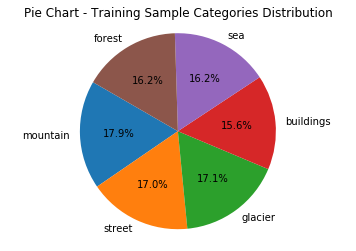

In [9]:
# Plot a pie chart
sizes = np.bincount(train_labels)
explode = (0, 0, 0, 0, 0, 0)  
plt.pie(sizes, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=False, startangle=150)
plt.axis('equal')
plt.title('Pie Chart - Training Sample Categories Distribution')

plt.show()


In [0]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

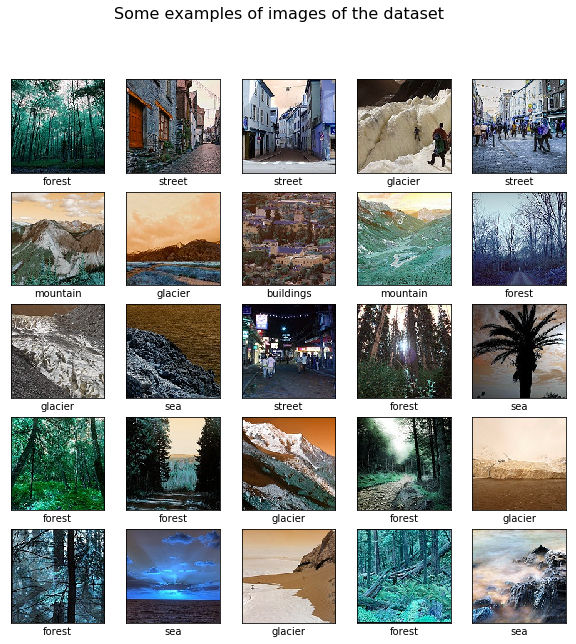

In [12]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
#Model1
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#Model2
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
kernel_init = initializers.RandomNormal(mean=0.0, stddev=0.05)
bias_init = initializers.RandomNormal(mean=0.0, stddev=0.05)
opt = optimizers.adam(lr=.0008)


In [0]:
#Model3
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(0.0025),
                        kernel_initializer=kernel_init, bias_initializer=bias_init, input_shape = (150, 150, 3)), 
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(0.0025),
                        kernel_initializer=kernel_init, bias_initializer=bias_init),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(0.0025),
                        kernel_initializer=kernel_init, bias_initializer=bias_init),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(0.0025),
                        kernel_initializer=kernel_init, bias_initializer=bias_init),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
#Model Fitting
history = model.fit(train_images, train_labels, batch_size=64, epochs=50, validation_data=(test_images, test_labels))

Train on 14033 samples, validate on 3000 samples
Epoch 1/50
14033/14033 [==============================] - 47s 3ms/sample - loss: 0.0747 - acc: 0.9892 - val_loss: 1.2486 - val_acc: 0.7730
Epoch 2/50
14033/14033 [==============================] - 47s 3ms/sample - loss: 0.0742 - acc: 0.9875 - val_loss: 1.3966 - val_acc: 0.7733
Epoch 3/50
14033/14033 [==============================] - 48s 3ms/sample - loss: 0.0728 - acc: 0.9893 - val_loss: 1.6621 - val_acc: 0.7440
Epoch 4/50
14033/14033 [==============================] - 47s 3ms/sample - loss: 0.0920 - acc: 0.9841 - val_loss: 1.3487 - val_acc: 0.7697
Epoch 5/50
14033/14033 [==============================] - 47s 3ms/sample - loss: 0.0669 - acc: 0.9909 - val_loss: 1.4498 - val_acc: 0.7790
Epoch 6/50
14033/14033 [==============================] - 47s 3ms/sample - loss: 0.0712 - acc: 0.9887 - val_loss: 1.3617 - val_acc: 0.7770
Epoch 7/50
14033/14033 [==============================] - 47s 3ms/sample - loss: 0.0667 - acc: 0.9908 - val_loss: 1.3

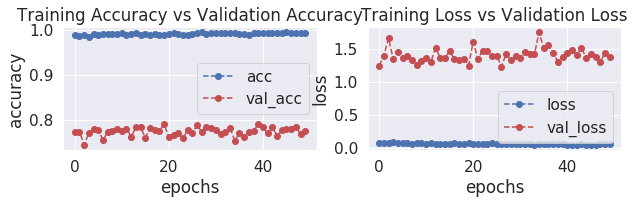

In [57]:
#Plots
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history.history['acc'],'bo--', label = "acc")
plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
plt.title("Training Accuracy vs Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history.history['loss'],'bo--', label = "loss")
plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
plt.title("Training Loss vs Validation Loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()

In [0]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Examples of mislabeled images by the Model:", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[mislabeled_labels[i]])
    plt.show()

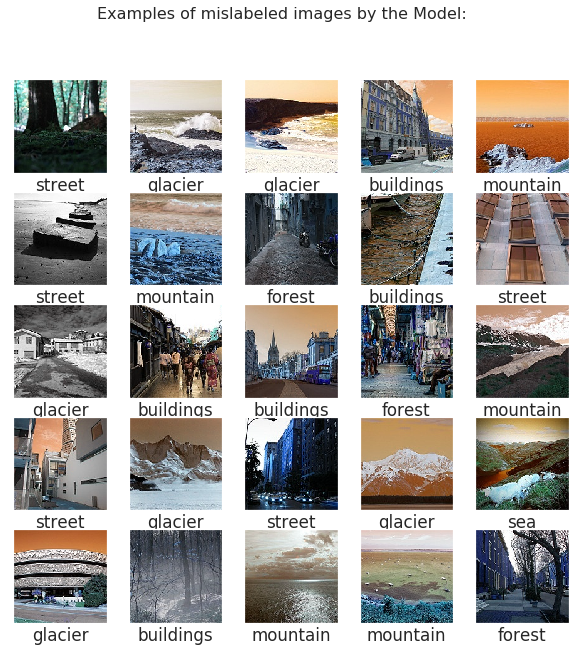

In [50]:
#Mis-classified
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)


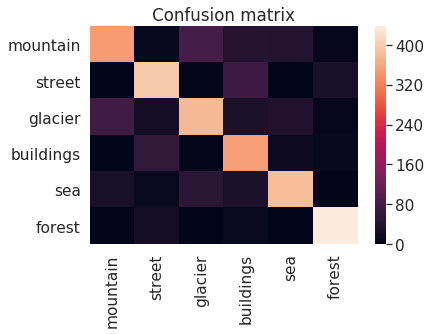

In [51]:
#Confusion Matrix
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.set(font_scale=1.4)
sn.heatmap(CM, annot=False,annot_kws={"size": 16},  xticklabels=class_names, yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()